In [52]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').show();
 } else {
 $('div.input').hide();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [19]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import itertools
from susipop import filter
from susipop import reader
from IPython.html.widgets import FloatProgress
from IPython.display import display
from ipywidgets import interactive
import ipywidgets as widgets
import scipy.stats as ss

%matplotlib notebook

import plotly
import susipop as sp
import pylab

import warnings
warnings.filterwarnings('ignore')

In [20]:
def get_folder_list():
    f = next(os.walk('.'))[1]
    return f
def sort_data(x,y):
    lists = sorted(itertools.izip(*[x, y]))
    new_x, new_y = list(itertools.izip(*lists))
    return new_x, new_y


# Comparison of time series data of viscosity

<IPython.core.display.Javascript object>


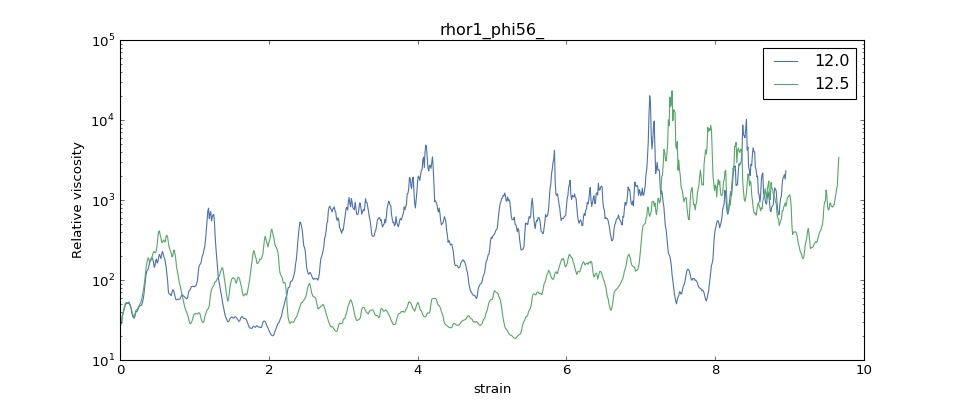

In [53]:
def plot_timeseries(phival,ydvals):
    plt.style.use('seaborn-deep')
    l = []
    phival = "phi"+str(phival)
    for f in get_folder_list():
        try:
            if f.split("_")[1] == phival:
                l.append(f)
        except:
            continue
    nufiles = [f+"/result/nu_t.dat" for f in l]
    plt.figure(figsize=[12,5])

    minshear = 100000
    for f in np.sort(nufiles):
        try:
            db = pd.read_csv(f)
            nu = db[db.columns[2]]
            nu_rel = db[db.columns[4]]
            t = db[db.columns[1]]
            shearrate = float(f.split("_")[2].split("/")[0].split("yd")[1])
            if shearrate in ydvals: 
                shear = t*shearrate
                if minshear > shear.max(): minshear = shear.max()
                plt.plot(shear,nu_rel,label=str(shearrate))
        except:
            continue
    plt.legend(loc="best")
    plt.title(f.split("/")[0].split("yd")[0])
    plt.yscale("log")
    plt.xlabel("strain")
    plt.ylabel("Relative viscosity")

#     plt.xlim([0,minshear])
    name = "comparison_viscosity_" + str(phival)+ '_'.join([str(i) for i in ydvals])
#     plt.savefig(name)

v = interactive(plot_timeseries, \
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                ydvals= widgets.SelectMultiple(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000]),\
                __manual=False)

display(v)

# Plot time series with viscosity histogram

In [33]:
from matplotlib import gridspec
def compare_with_hist(phival,shearrate,bins = "fd",ylim=[0,5],orientation="vertical"):
    f = "rhor1_phi"+str(phival)+"_yd"+str(float(shearrate))+"/"
    if os.path.exists(f+"/result/nu_t.dat"):
        fig = plt.figure(figsize=(12, 6)) 
        gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
        ax0 = plt.subplot(gs[0])

        minshear = 100000

        db = pd.read_csv(f+'/result/nu_t.dat')
        nu = db[db.columns[2]]
        nu_rel = db[db.columns[4]]
        t = db[db.columns[1]]
        shearrate = float(f.split("_")[2].split("/")[0].split("yd")[1])

        shear = t*shearrate
        if shear.max() > 2:
            n = int(len(t)/float(shear.max()))
        else:
            n = -100
        shear = shear[n:]
        nu_rel = nu_rel[n:]
        if minshear > shear.max(): minshear = shear.max()
        ax0.plot(shear,np.log10(nu_rel),label=str(shearrate))


        plt.legend(loc="best")
        plt.title(f)
        plt.ylim(ylim)
        plt.xlabel("strain")
        plt.ylabel("log10 Relative viscosity")

        ax1 = plt.subplot(gs[1])
        ax1.hist(np.log10(nu_rel),bins,orientation=orientation)    
        plt.tight_layout()
        plt.ylim(ylim)
    #     plt.xlim([0,minshear])
        name = "comparison_viscosity_" + f.split('/')[0][:-2]
    else:
        print "enter valid phi and shearrate values"

<IPython.core.display.Javascript object>


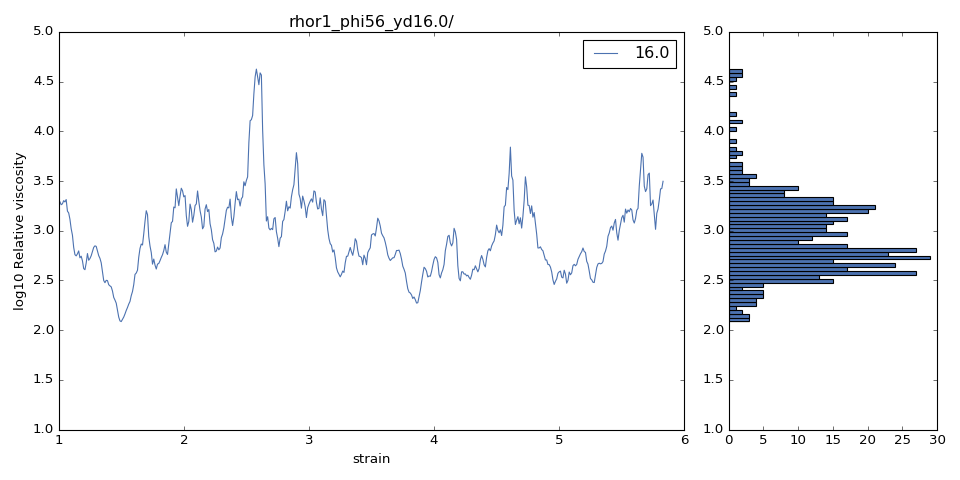

In [252]:
# compare(54,[20, 30, 50])
# compare_with_hist(phival=56,shearrate=12,bins=100,ylim=[1,5])
# compare_with_hist('rhor1_phi56_yd14.0/',bins=100,ylim=[1,5])

data from snapshot  99 to  894


<IPython.core.display.Javascript object>


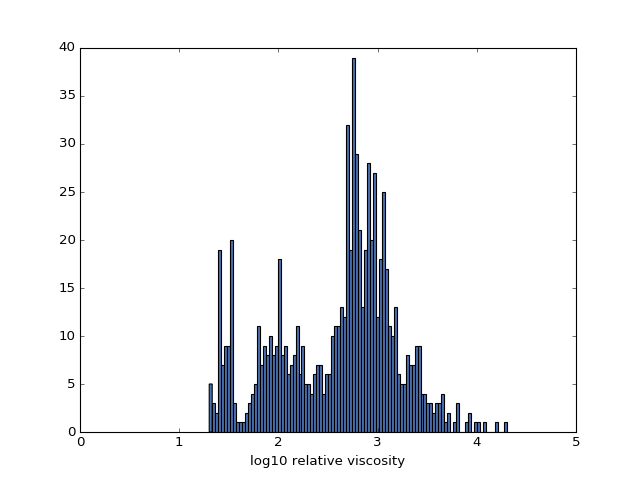

In [34]:

files = get_folder_list()
v = interactive(compare_with_hist, \
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value = 12),\
                ylim = widgets.FloatRangeSlider(min = 0,max = 20, value = [0,5]),\
                orientation = widgets.ToggleButtons(options = ["horizontal","vertical"], value = "vertical", description = "orient"),\
                bins=(10,100), __manual=False)

display(v)

# Plot Viscosity Histograms

data from snapshot  99 to  894


<IPython.core.display.Javascript object>


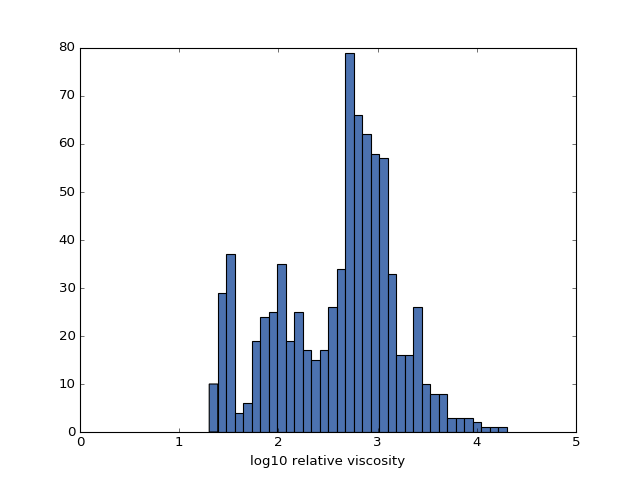

In [35]:
def plot_histogram_time_series(phival,shearrate,bins):
    f = "rhor1_phi"+str(phival)+"_yd"+str(float(shearrate))+"/result/nu_t.dat"
    if os.path.exists(f):
        db =pd.read_csv(f)
        nu = db[db.columns[2]]
        nu_rel = db[db.columns[4]]
        t = db[db.columns[1]]
        shearrate = float(f.split("_")[2].split("/")[0].split("yd")[1])
        shear = t*shearrate
        if shear.max() > 2:
            n = int(len(t)/float(shear.max()))
        else:
            n = -50
        print "data from snapshot ",n, "to " ,len(t)
        nu_rel=nu_rel[n:]
        nu_rel = np.log10(nu_rel)
        plt.figure()
        plt.hist(nu_rel, bins)
        plt.xlim([0,5])
        plt.xlabel("log10 relative viscosity")
    else:
        print "enter valid phi and shearrate values"
    

v = interactive(plot_histogram_time_series, \
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value = 12),\
                bins=(10,100,5), __manual=False)

display(v)

# Compare Viscosity time series histograms

<IPython.core.display.Javascript object>


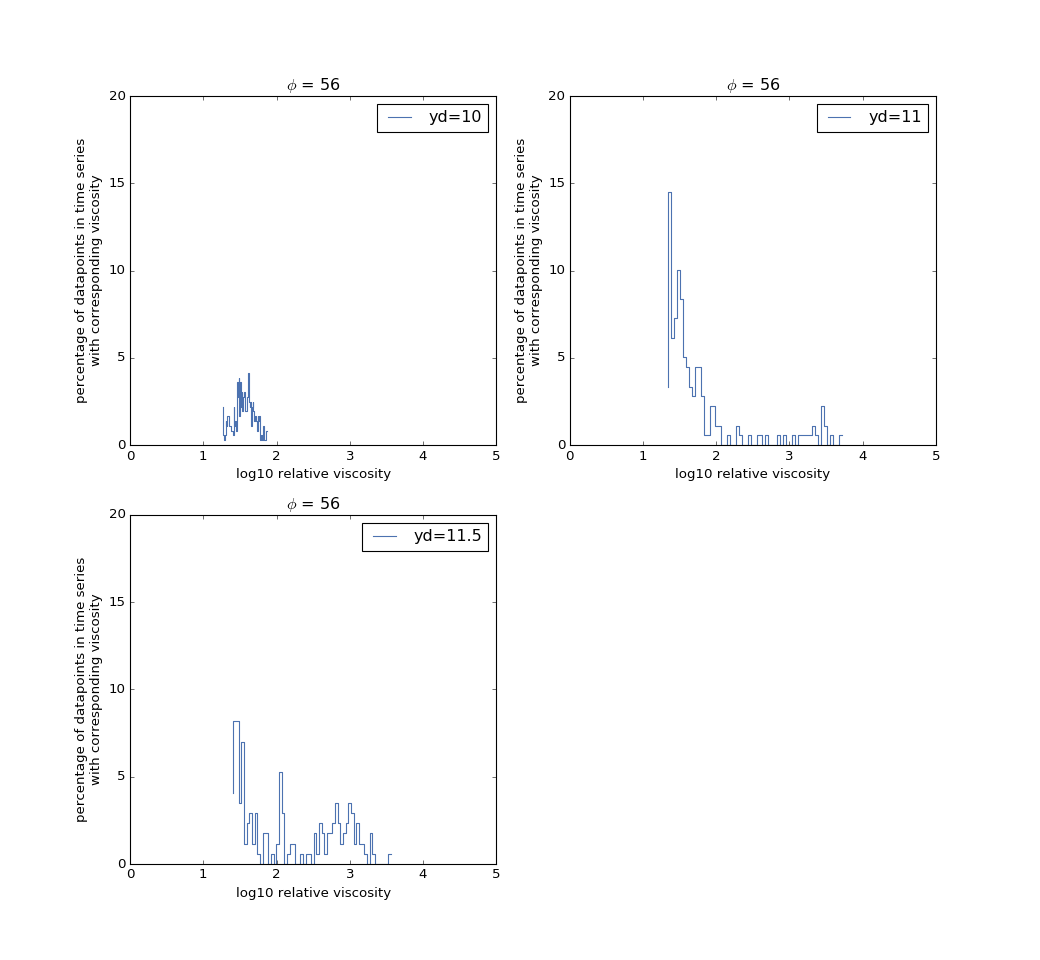

4.62999999999
3.13973885562
2.76009181636


In [47]:
def plot_hist(phival, ydvals,bin_num,xscale,yscale):
    plt.figure(figsize=[13,6*(len(ydvals)/2+len(ydvals)%2)])
    plt.title("phival = "+str(phival))
    j = len(ydvals)
    for i,shearrate in enumerate(ydvals):
#         plt.figure(figsize=[10,10]) # uncomment to plot each plot separately, not as subplots
        try:
            plt.subplot(int(j/2.0)+1,2,i+1)
            exp = reader.DataSet("rhor1_phi"+str(phival)+"_yd"+str(float(shearrate)))
            exp.load_state(exp.tlist[-1])

            max_strain = float(exp.t)*exp.shearrate*exp.dt
            print max_strain
            n = len(exp.tlist[1:])
            if max_strain >= 1:
                n_last_strain = int(float(n)/max_strain)
                
            else:
                n_last_strain = -30

#             n_last_strain = 50
            f = "rhor1_phi"+str(phival)+"_yd"+str(float(shearrate))+"/result/nu_t.dat"
            db = pd.read_csv(f)
            nu = db[db.columns[2]][n_last_strain:]
            nu_rel = db[db.columns[4]][n_last_strain:]
            
            #==============================================
#             nu_rel = nu_rel/max(nu_rel) # normalize everything
            #==============================================

            hist, bin_edges = np.histogram(np.log10(nu_rel),bin_num, density=False)

#             hist = ss.relfreq(nu_rel,numbins=bin_num)
#             hist = hist.frequency*100.0
            hist = hist/float(len(nu))*100
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
            plt.step(bin_centers,hist,label="yd="+str(shearrate))
            """
            x = []
            for i in range(len(bin_edges)-1):
                x.append((bin_edges[i]+bin_edges[i+1])/2.0)
            x = np.log10(x)
            poly_fit_hist = np.poly1d(np.polyfit(x, hist, 30))
            
            plt.plot(x,hist,'-g',label="yd="+str(shearrate)+" histogram")
            plt.plot(x,poly_fit_hist(x),'r',label="yd="+str(shearrate)+" polyfit")
            plt.hist(np.log10(nu_rel), bin_num,alpha=0.1,label="yd="+str(shearrate))
            """
            plt.ylim(yscale)
            plt.xlim(xscale)
        except Exception as e:
            print e
            continue
        
#         plt.xlim([0,6000])
        plt.title("$\phi$ = "+str(phival))
#         plt.xlabel(" relative viscosity")
        plt.xlabel("log10 relative viscosity")
        plt.ylabel("percentage of datapoints in time series\nwith corresponding viscosity")
#         plt.xscale("log")
#         plt.yscale("log")
        plt.legend()

v = interactive(plot_hist, \
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                ydvals= widgets.SelectMultiple(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000]),\
                xscale = widgets.IntRangeSlider(min = 0,max = 7, value = [0,5]),
                yscale = widgets.IntRangeSlider(min = 0,max = 50, value = [0,20]),
                bin_num = widgets.IntSlider(min =10,max = 100,step =5,value = 60),
                __manual=True)

display(v)

-inf